<a href="https://colab.research.google.com/github/josephyaconelli/VAEs-in-Economics/blob/master/Demographic_Data_ATUS_2013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np 

# data
df = pd.read_csv('https://raw.githubusercontent.com/yaniv256/VAEs-in-Economics/master/Data/Timeuse/atussum_2013/atussum_2013.dat')


In [0]:
from keras.utils import to_categorical

#GTMETSTA (Metropolitan Status)
catGTMETSTA = to_categorical(df['GTMETSTA'])

metropolitan = catGTMETSTA[:,1]
nonMetropolitan = catGTMETSTA[:,2]

Using TensorFlow backend.


In [0]:

#PEEDUCA
peeduca = df['PEEDUCA']

peeducaMap = {
  31: 'Less than 1st grade',
  32: '1st, 2nd, 3rd, or 4th grade',
  33: '5th or 6th grade',
  34: '7th or 8th grade',
  35: '9th grade',
  36: '10th grade',
  37: '11th grade',
  38: '12th grade - no diploma',
  39: 'High school graduate - diploma or equivalent (GED)',
  40: 'Some college but no degree',
  41: 'Associate degree - occupational/vocational',
  42: 'Associate degree - academic program',
  43: 'Bachelors degree (BA, AB, BS, etc.)',
  44: 'Masters degree (MA, MS, MEng, MEd, MSW, etc.)',
  45: 'Professional school degree (MD, DDS, DVM, etc.)',
  46: 'Doctoral degree (PhD, EdD, etc.)'
}

mappedPEEDUCA = peeduca.map(peeducaMap)
education = pd.get_dummies(mappedPEEDUCA)

In [0]:
# PEHSPNON

hispanic = df['PEHSPNON'] == 1
hispanic = hispanic.astype("float32")
hispanic.name = "Hispanic"
print(hispanic)

0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
11380    0.0
11381    1.0
11382    1.0
11383    0.0
11384    1.0
Name: Hispanic, Length: 11385, dtype: float32


In [0]:
# PTDTRACE

raceDf = df['PTDTRACE']
raceMap = {
    1: 'White only',
    2: 'Black only',
    3: 'American Indian, Alaskan Native only',
    4: 'Asian only',
    5: 'Hawaiian/Pacific Islander only',
    6: 'White-Black',
    7: 'White-American Indian',
    8: 'White-Asian',
    9: 'White-Hawaiian',
    10: 'Black-American Indian',
    11: 'Black-Asian',
    12: 'Black-Hawaiian',
    13: 'American Indian-Asian',
    14: 'Multi-Race',
    15: 'Multi-Race',
    16: 'Multi-Race',
    17: 'Multi-Race',
    18: 'Multi-Race',
    19: 'Multi-Race',
    20: 'Multi-Race',
    21: 'Multi-Race',
    22: 'Multi-Race',
    23: 'Multi-Race',
    24: 'Multi-Race',
    25: 'Multi-Race',
    26: 'Multi-Race',

}

mappedRace = raceDf.map(raceMap)
race = pd.get_dummies(mappedRace)
print(np.mean(race))
print(race.columns)

American Indian, Alaskan Native only    0.008783
Asian only                              0.037330
Black only                              0.150637
Black-American Indian                   0.000966
Black-Asian                             0.000351
Black-Hawaiian                          0.000088
Hawaiian/Pacific Islander only          0.001845
Multi-Race                              0.000878
White only                              0.788494
White-American Indian                   0.006500
White-Asian                             0.001318
White-Black                             0.002459
White-Hawaiian                          0.000351
dtype: float64
Index(['American Indian, Alaskan Native only', 'Asian only', 'Black only',
       'Black-American Indian', 'Black-Asian', 'Black-Hawaiian',
       'Hawaiian/Pacific Islander only', 'Multi-Race', 'White only',
       'White-American Indian', 'White-Asian', 'White-Black',
       'White-Hawaiian'],
      dtype='object')


            Age
0      0.073574
1      0.341341
2      0.487988
3      0.540541
4      0.454955
...         ...
11380  1.000000
11381  0.719219
11382  0.417417
11383  0.505506
11384  0.360360

[11385 rows x 1 columns]


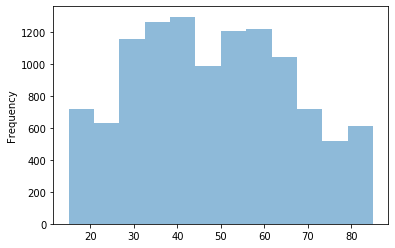

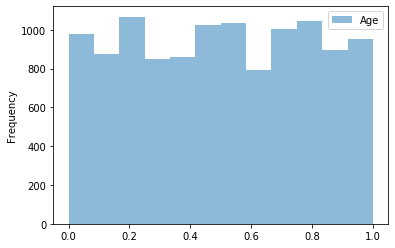

In [0]:
# Age
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt


ageDf = df['TEAGE']
ageDf.plot.hist(bins=12, alpha=0.5)
ageDf = ageDf.values.reshape(-1, 1)
qt_trans = QuantileTransformer(n_quantiles=1000, random_state=0)
age = pd.DataFrame(qt_trans.fit_transform(ageDf))
age.columns = ['Age']
age.plot.hist(bins=12, alpha=0.5)

print(age)


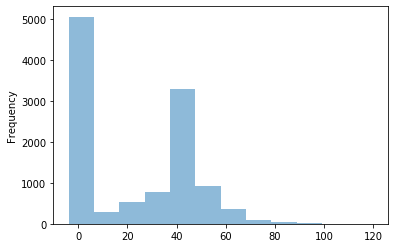

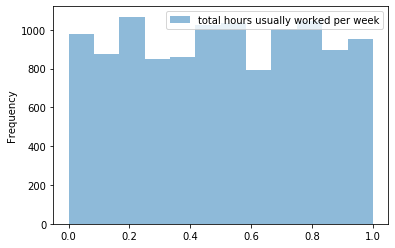

In [0]:
# Hours Worked

hoursWorkedDf = df['TEHRUSLT']
hoursWorkedDf.plot.hist(bins=12, alpha=0.5)
hoursWorkedDf = ageDf.reshape(-1, 1)
qt_trans = QuantileTransformer(n_quantiles=1000, random_state=0)
hoursWorked = pd.DataFrame(qt_trans.fit_transform(hoursWorkedDf))
hoursWorked.columns = ['total hours usually worked per week']
hoursWorked.plot.hist(bins=12, alpha=0.5)

In [0]:
# Employement Status

employementStatusDf = df['TELFS']
employmentStatusMap = {
  1: 'Employed - at work',
  2: 'Employed - absent',
  3: 'Unemployed - on layoff',
  4: 'Unemployed - looking',
  5: 'Not in labor force',
}
mappedES = employementStatusDf.map(employmentStatusMap)
employementStatus = pd.get_dummies(mappedES)
print(np.mean(employementStatus))

Employed - absent         0.025911
Employed - at work        0.573474
Not in labor force        0.348265
Unemployed - looking      0.048134
Unemployed - on layoff    0.004216
dtype: float64


In [0]:
# Work more than one job
mtoJob = df['TEMJOT'] == 1
mtoJob = mtoJob.astype("float32")
mtoJob.name = "in the last seven days did you have more than one job? - yes"
print(mtoJob)


0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
11380    0.0
11381    0.0
11382    0.0
11383    0.0
11384    0.0
Name: in the last seven days did you have more than one job? - yes, Length: 11385, dtype: float32


In [0]:
# Enrolled in high school, college, or university
enrolledInSchool = df['TESCHENR'] == 1
enrolledInSchool = enrolledInSchool.astype("float32")
enrolledInSchool.name = "Are you enrolled in high school, college, or university? - Yes"
print(np.mean(enrolledInSchool))

0.08739569783210754


In [0]:

whatSchoolDf = df['TESCHLVL']
whatSchoolMap = {
  1: 'High school',
  2: 'College or university',
}
mappedWhatSchool = whatSchoolDf.map(whatSchoolMap)
whatSchool = pd.get_dummies(mappedWhatSchool)
print(np.mean(whatSchool))


College or university    0.050944
High school              0.036451
dtype: float64


In [0]:
# Sex
sexDf = df['TESEX'] == 2
sex = sexDf.astype("float32")
sex.name = "Sex, Female"
print(np.mean(sex))





0.5536231994628906


In [0]:
# Emplyment of spouse
employmentOfSpouseDF = df['TESPEMPNOT'] == 1
employementOfSpouse = employmentOfSpouseDF.astype("float32")
employementOfSpouse.name = "Employement of spouse, employed"
print(np.mean(employementOfSpouse))


0.34325867891311646
